K-means is widely used for many applications:
    1. image segmentation
    2. clustering 
    3. anomaly detection
    
the algorithm works as follows, assuming we have n points and value of K
    Step1. pick K random porints as cluster centers called centroid
    Step2. assign each point to its nearest cluster 
    Step3. Find new cluster by taking average of the assigned points
    Step4. Repeat 2 and 3 until none of the cluster assignments change

In [57]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
from copy import deepcopy

### 1. Download data

In [5]:
data = pd.read_csv('xclara.csv')
print (data.shape)

(3000, 2)


In [6]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


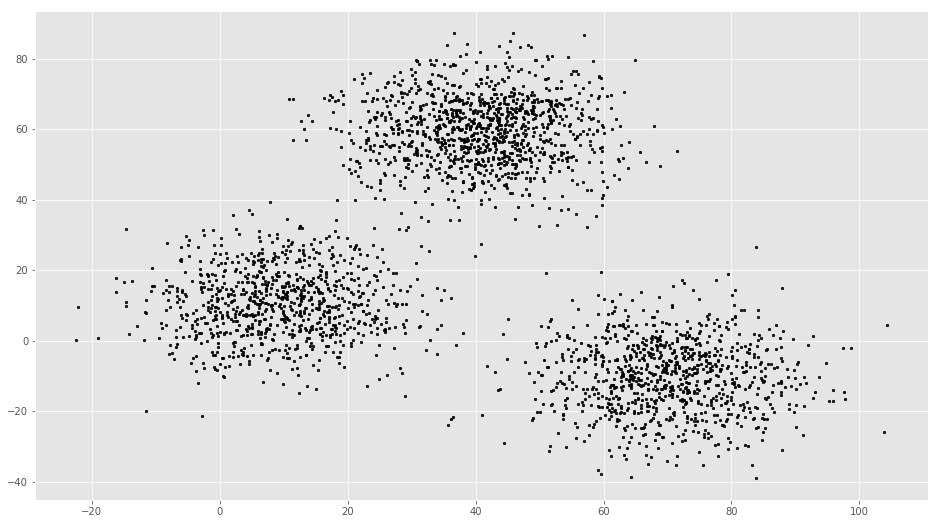

In [12]:
f1 = data.V1.get_values()
f2 = data.V2.get_values()
X = np.array(list(zip(f1, f2)))

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.scatter(f1, f2, c = 'black', s = 7)
plt.show()

In [13]:
# euclidean calculator
def dis_cal(point, cluster, ax = 1):
    return np.linalg.norm(point - cluster, axis = ax)

In [41]:
k = 3
C = np.asarray(random.sample(list(X), k))
C

array([[ 44.66972,  69.17705],
       [ 57.78369,  73.30975],
       [-14.94727,  16.5969 ]])

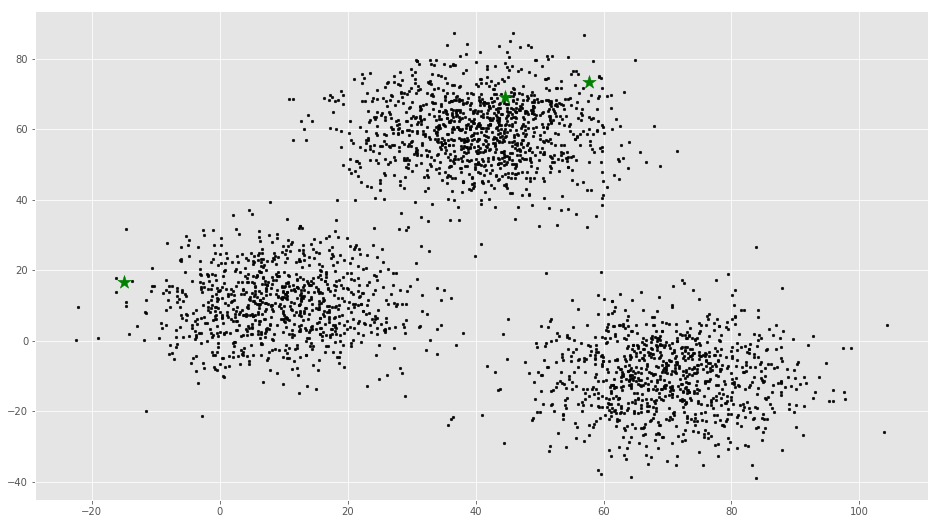

In [42]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')
plt.show()

In [60]:
# initialization
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dis_cal(C_old, C,None)
threshold = 1e-7

while error >= threshold:
    for i in range(len(X)):
        dist = dis_cal(X[i], C)
        cluster = np.argmin(dist)
        clusters[i] = cluster
    # save old centers
    C_old = deepcopy(C)
    # recalculate centers by taking avg
    for clus in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == clus]
        C[clus] = np.mean(points, axis = 0)
    error = dis_cal(C_old, C, None)

In [62]:
print (C)
print (error)

[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]
0.0


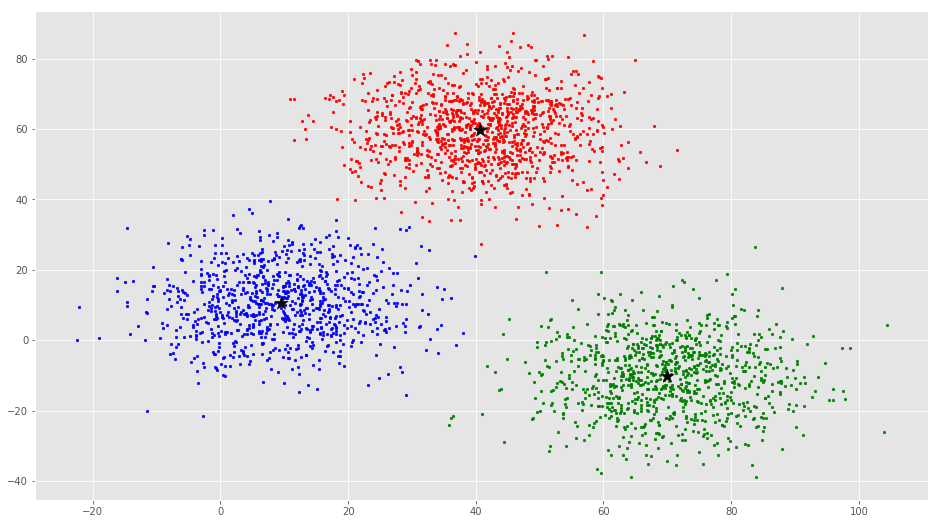

In [65]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()